# Applied Statistics - Assessment Problems

This notebook explores key statistical concepts through hands-on simulations and analyses using Python. It covers probability experiments, sampling distributions, t-tests, type II errors, and ANOVA, with a focus on hypothesis testing and data interpretation. The exercises demonstrate how to apply statistical reasoning, visualize data, and compare methods for analyzing group differences.

*****
## Problem 1: Extending the Lady Tasting Tea

In this problem, we extend the classic Lady Tasting Tea experiment by increasing the number of cups from 8 (4 tea-first, 4 milk-first) to 12 (8 tea-first, 4 milk-first) and estimates the probability of correctly identifying all cups by chance using NumPy simulations. The results are compared to the original 8-cup experiment to interpret extreme outcomes and discuss potential adjustments to the p-value threshold.

The problem is divided into five parts for a step-by-step analysis:
- Libraries: All libraries requeried for the problem.
- Part A: Original Tea Experiment (8 Cups of Tea).
- Part B: Extended Tea Experiment (12 Cups of Tea).
- Part C: Comparing Original Tea Experiment vs. Extended Tea Experiment
- Conclusion: Interpretation of results and discussion of implications for statistical significance.


####  - Libraries:

In [145]:
# Numerical structures and operations.
import numpy as np
# Reference: https://numpy.org/doc/stable/reference/index.html#reference

# Mathematical functions from the standard library.
import math
# Reference: https://docs.python.org/3/library/math.html

# Plotting.
import matplotlib.pyplot as plt
# Reference: https://matplotlib.org/stable/contents.html

# Random selections.
import random
# Reference: https://docs.python.org/3/library/random.html

#### - Part A: Original Tea Experiment (8 Cups of Tea)

The original Lady Tasting Tea experiment was designed to test a lady's claim that she could distinguish whether milk or tea was added first to a cup. The experiment used 8 Cups of Tea: 4 prepared with milk first and 4 prepared with tea first. The cups were presented to the participant in a random order, and she was asked to classify them correctly.

- Experiment calculation:

In this calculation, we will determine the number of possible combinations where the order of selection does not matter, no element is chosen more than once, and the probability of the lady correctly selecting 4 Cups of Tea.

In [146]:
# Number of cups of tea in total.
no_cups = 8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 4

Calculating the number of ways to choose *\(k\)* elements from a set of *\(n\)* elements, where the order does not matter and no element is selected more than once.

In [147]:
# Number of possible combinations.
comb = math.comb(no_cups, no_cups_milk_first) # Reference: https://docs.python.org/3/library/math.html#math.comb

# Show the result.
print ("The number of possible combinations is:", comb)

The number of possible combinations is: 70


The number of possible combinations is:

$$C(n, k) = \binom{8}{4} = 70 \text{ combinations}$$

Calculating the probability of correctly selecting for the Original Tea Experiment (8 Cups of Tea).

In [148]:
# Probability of the four correct cups.
prob = 1 / comb

# Show the result.
print('Probability of correctly identifying the Original Tea Experiment (8 Cups of Tea) is:', prob)

Probability of correctly identifying the Original Tea Experiment (8 Cups of Tea) is: 0.014285714285714285


The probability of correctly selecting the Original Tea Experiment (8 Cups of Tea) by chance is:

$$
P = \frac{1}{\binom{8}{4}} = \frac{1}{70} \approx 0.0143
$$

This shows that the probability of guessing all cups correctly by chance is very low.

- Simulation using NumPy:

To verify the theoretical probability, we simulate the Lady Tasting Tea experiment using NumPy. In this setup, the 8 cups are represented as an array with:

- **0** for cups of tea with milk in first (4 cups).
- **1** for cups of tea with tea in first (4 cups).

In [149]:
# Number of cups of tea in total: 4 cups of tea with milk in first (0) and 4 cups of tea with tea in first (1).
cups_8 = np.array([1]*4 + [0]*4)

The steps of the simulation are:

1. Randomly shuffle the cups to simulate a random presentation.
2. The participant randomly selects 4 cups, representing a guess made by chance.
3. We check whether all 4 selected cups are tea-first (i.e., the sum of the selected cups equals 4).
4. Repeat this process a large number of times (150,000 simulations).
5. Estimate the probability by:

$$
\text{Estimated Probability} = \frac{\text{Number of Successful Trials}}{\text{Total Number of Trials}}
$$

In [150]:
# Number of simulation trials.
trials = 150000
successes = 0

# Simulation:

for _ in range(trials): # Reference: https://www.geeksforgeeks.org/python/python-range-function/
    # Randomize the order of the cups.
    np.random.shuffle(cups_8) # Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
    
    # Participant randomly selects 4 cups (guessing).
    guess_indices = np.random.choice(range(8), size=4, replace=False)
    guessed_cups = cups_8[guess_indices]
    
    # Check if all 4 selected cups are tea-first (sum == 4).
    if np.sum(guessed_cups) == 4:
        successes += 1

# Probability Estimate:

simulated_probability = successes / trials
print("Estimated probability from simulation:", simulated_probability)


Estimated probability from simulation: 0.014593333333333333


This provides an empirical approximation of the probability of correctly identifying all 4 tea-first cups purely by chance.  
The simulated probability should be close to the theoretical value:

$$
P = \frac{1}{70} \approx 0.0143
$$

This confirms that correctly identifying all cups is highly unlikely under random guessing.

#### - Part B: Extended Tea Experiment (12 Cups of Tea)

In this part, we extend the classic Lady Tasting Tea experiment by increasing the total number of cups from 8 to 12, with 8 cups prepared with tea first and 4 cups prepared with milk first. This extension allows us to explore how increasing the number of cups affects the likelihood of extreme outcomes and the interpretation of statistical significance. By simulating the experiment multiple times, we can empirically approximate the probability and compare it with the theoretical expectations.

- Experiment calculation:

In this calculation, we determine the number of possible combinations when selecting the 8 tea-first cups out of the 12 total cups. As before, the order of selection does not matter and no element is chosen more than once. We then compute the probability that the participant correctly identifies all 8 tea-first cups purely by chance.

In [151]:
# Number of cups of tea in total.
no_cups_ext = 12

# Number of cups of tea with milk in first.
no_cups_milk_first_ext = 4

# Number of cups of tea with tea in first.
no_cups_tea_first_ext = 8

Calculating the number of ways to choose *\(k\)* elements from a set of *\(n\)* elements, where the order does not matter and no element is selected more than once.

In [152]:
# Number of possible combinations.
comb_ext = math.comb(no_cups_ext, no_cups_milk_first_ext) # Reference: https://docs.python.org/3/library/math.html#math.comb

# Show the result.
print ("The number of possible combinations is:", comb_ext)

The number of possible combinations is: 495


The number of possible combinations is:

$$C(n, k) = \binom{12}{4} = 495 \text{ combinations}$$

Calculating the probability of correctly selecting for the Extended Tea Experiment (12 Cups of Tea).

In [153]:
# Probability of the Extended Tea Experiment (12 Cups of Tea).
prob_ext = 1 / comb_ext

# Show the result.
print('Probability of correctly identifying for the Extended Tea Experiment (12 Cups of Tea) is:', prob_ext)

Probability of correctly identifying for the Extended Tea Experiment (12 Cups of Tea) is: 0.00202020202020202


The probability of correctly selecting the Extended Tea Experiment (12 Cups of Tea)
$$
P = \frac{1}{\binom{12}{4}} = \frac{1}{495} \approx 0.0020
$$

This confirms that correctly identifying all cups is highly unlikely under random guessing.

- Simulation using NumPy:

To extend the original Lady Tasting Tea experiment, we now consider 12 cups instead of 8, consisting of:
- **0** for cups of tea with milk in first (4 cups).
- **1** for cups of tea with tea in first (4 cups).

In [154]:
# Number of cups of tea in total: 8 cups of tea with tea in first (1), 4 cups of tea with milk in first (0).
cups_12 = np.array([1]*8 + [0]*4)


The participant claims to correctly identify all tea-first cups.  
To estimate the probability of achieving this purely by chance, we simulate the experiment using NumPy.

The simulation follows these steps:
  
1. Randomly shuffle the array to simulate a random presentation order.  
2. The participant “guesses” by randomly selecting 8 cups, attempting to identify all tea-first cups.  
3. A trial is counted as a success only if all selected cups are tea-first (i.e., their sum equals 8).  
4. Repeat the experiment over 150,000 trials to obtain a stable estimate.  
5. Estimate the probability by:

$$
\text{Estimated Probability} = \frac{\text{Number of Successful Trials}}{\text{Total Number of Trials}}
$$

In [155]:
# Number of simulation trials.
trials = 150000
successes_12 = 0

# Simulation:

for _ in range(trials):
    # Randomly shuffle the cups.
    np.random.shuffle(cups_12)
    
    # Participant randomly selects 8 cups (guessing tea-first cups).
    guess_indices = np.random.choice(range(12), size=8, replace=False)
    guessed_cups = cups_12[guess_indices]
    
    # Check if all 8 selected cups are tea-first.
    if np.sum(guessed_cups) == 8:
        successes_12 += 1

# Probability Estimate:

simulated_probability_12 = successes_12 / trials
print("Estimated probability from simulation:", simulated_probability_12)

Estimated probability from simulation: 0.0019933333333333335


This provides an empirical approximation of the probability of correctly identifying all 8 tea-first cups purely by chance. The simulated probability can be compared to the theoretical value:

$$
P = \frac{1}{495} \approx 0.0020
$$

This shows that correctly identifying all cups in the Extended Tea Experiment (12 Cups of Tea) is even more unlikely under random guessing than in the Original Tea Experiment (8 Cups of Tea) design.


#### - Part C: Comparing Original Tea Experiment vs. Extended Tea Experiment

The extended 12-cup experiment makes it significantly harder to guess all cups correctly by chance. The probability drops from:

- **1 in 70** → Original Tea Experiment (8 Cups of Tea) to **1 in 495** → Extended Tea Experiment (12 Cups of Tea).

This is more than a **7-fold decrease** in chance success.

As a result, the Extended Tea Experiment (12 Cups of Tea) provides stronger evidence against random guessing and may justify using a similar or even slightly more relaxed p-value threshold, because the design itself is already far more stringent.


#### - Conclusion:

The Lady Tasting Tea experiment provides a clear illustration of how experimental design influences the strength of statistical evidence.  
In the Original Tea Experiment, the probability of correctly identifying all tea-first cups by chance is:

$$
P_{\text{8 cups}} = \frac{1}{70} \approx 0.0143
$$

Extending the experiment to  Extended Tea Experiment makes chance success even more unlikely:

$$
P_{\text{12 cups}} = \frac{1}{495} \approx 0.00202
$$

This represents a substantial reduction in the likelihood of achieving a perfect result through random guessing, more than seven times less likely than in the original design.

Because the extended experiment is naturally more stringent, it strengthens the evidence against the null hypothesis and reduces the need for an extremely strict p-value threshold. In other words, the design itself builds in stronger protection against false positives.

Overall, the simulations confirm the theoretical probabilities and demonstrate how expanding the experiment enhances its discriminatory power, making it a more robust test of the participant’s claimed ability.


*****
## Problem 2: Normal Distribution

In this problem, we investigated how sampling variability affects estimates of the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).  
We generate 100000 samples, each of size 10, drawn from a standard normal distribution.  
For every sample we compute:

- The sample standard deviation (using `ddof = 1`)
- The population standard deviation (using `ddof = 0`)

We then plot histograms of both sets of values on the same axes to visualize the difference between the two estimators.  

This allows us to compare how biased or variable each estimator is, and to understand how the gap between them changes as sample size increases.


####  - Libraries:

In [156]:
# Numerical structures and operations.
import numpy as np
# Reference: https://numpy.org/doc/stable/reference/index.html#reference

# Plotting.
import matplotlib.pyplot as plt
# Reference: https://matplotlib.org/stable/contents.html

####  - Part A: Generating Data

In this step, we generate many repeated samples from the standard normal distribution and compute two different versions of the standard deviation for each sample. The goal is to compare the **sample standard deviation (using ddof=1)** with the **population standard deviation (using ddof=0)**.

In [157]:
# Setting parameters.
num_samples = 100000   # number of samples
sample_size = 10        # size of each sample

Here we define:

- `num_samples = 100000`: we will generate 100000 separate samples.

- `sample_size = 10`: each sample will contain 10 numbers drawn from the standard normal distribution.

This means our dataset will have shape (100000 × 10).

In [158]:
# Generating samples from standard normal distribution.
samples = np.random.randn(num_samples, sample_size) # Refrence: https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

- `np.random.randn()` draws random numbers from the standard normal distribution (mean = 0, SD = 1).

- Passing (num_samples, sample_size) creates a 2-D array where:
    - each row is one sample of size 10.
    - each column corresponds to the same position across samples.

In [159]:
# Compute SD with ddof=1 (sample SD).
sd_sample = samples.std(axis=1, ddof=1) # Reference:  https://numpy.org/devdocs/reference/generated/numpy.std.html

- `axis=1`: calculate SD for each row (each sample).

- `ddof=1`: gives the sample SD, which divides by 𝑛 − 1.

This produces the sample standard deviation, which is an unbiased estimator of the population SD.

We now have 100000 sample SD values.

In [160]:
# Compute SD with ddof=0 (population SD).
sd_population = samples.std(axis=1, ddof=0) # Reference:  https://numpy.org/devdocs/reference/generated/numpy.std.html

- `ddof=0`: gives the population SD, dividing by 𝑛.

    This is the population formula, which tends to underestimate the true SD for small samples.

Again, we get 100000 population SD values.

In [161]:
# Showing the array so we can visually check the structure of the generated data.
samples

array([[ 3.11350379e-01, -1.18659454e+00, -1.60668193e+00, ...,
        -1.04521108e+00,  8.80186071e-01,  1.10048215e+00],
       [ 1.91404639e-01,  5.73789146e-01, -1.40058620e-01, ...,
        -5.97373703e-01, -1.94658837e-01,  1.12052356e+00],
       [-2.17682050e-03, -2.30173135e-01,  2.05516266e+00, ...,
        -9.00014508e-01,  1.22220311e+00,  7.37293119e-02],
       ...,
       [-4.82939864e-01,  2.08111116e+00, -8.83474746e-01, ...,
         5.59602451e-01,  8.02767025e-01, -3.09843381e-01],
       [-1.90820691e-01, -7.03433256e-01,  1.47312631e+00, ...,
        -3.10203427e+00, -7.07488089e-01,  1.30663155e+00],
       [ 1.92701741e-01, -8.79529280e-01,  2.16632460e-02, ...,
        -2.11071141e-01, -3.35472131e-01,  9.28224775e-01]])

In this step, we generated 100000 samples of size 10 from a standard normal distribution using `np.random.randn`. I then calculated two versions of the standard deviation for each sample:

- `ddof=1`: the sample SD, which is an unbiased estimator.

- `ddof=0`: the population SD, which tends to underestimate the true SD for small samples.

These values will later be compared using histograms.

####  - Part B: Histogram Comparison

In this section, we created a visual comparison between the two different estimates of standard deviation:

- Sample Standard Deviation (ddof = 1)

- Population Standard Deviation (ddof = 0)

Both sets of values were generated from the same 100000 simulated samples of size 10.
The purpose of the histogram is to show how these two estimators behave differently when the sample size is small.

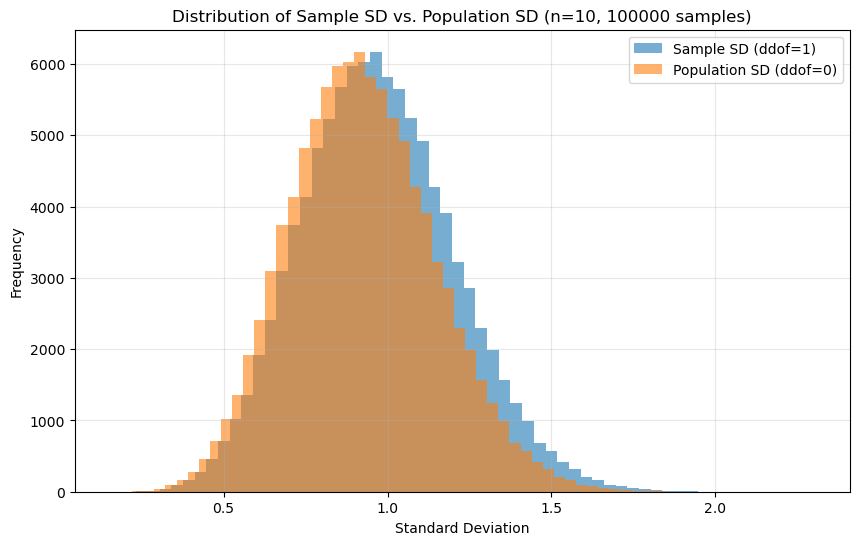

In [162]:
# Plotting the histograms.
plt.figure(figsize=(10,6))
# Plotting histogram of sample standard deviations (ddof=1).
plt.hist(sd_sample, bins=60, alpha=0.6, label="Sample SD (ddof=1)")
# Plotting histogram of population standard deviations (ddof=0).
plt.hist(sd_population, bins=60, alpha=0.6, label="Population SD (ddof=0)")

# Adding title and axis labels.
plt.title("Distribution of Sample SD vs. Population SD (n=10, 100000 samples)")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
# Displaying legend and grid.
plt.legend()
plt.grid(alpha=0.3)
# Displaying the plot.
plt.show()

The histogram compares the distribution of sample standard deviations (ddof=1) with the distribution of population standard deviations (ddof=0) across 100000 repeated samples of size 10 from a standard normal distribution. Both sets of values represent estimates of the true population standard deviation (σ = 1), but they behave differently because they use different formulas.

- The ddof=1 (sample SD) distribution is shifted slightly to the right.
- The ddof=0 (population SD) distribution is slightly lower and more left-shifted.
- Both distributions are spread out because n = 10 is small.
- The sample SD distribution more closely centers around the true value of 1.

If the sample size were increased (e.g., n = 30, 100, 1000), both histograms would tighten and move closer together because the bias correction becomes negligible, causing the ddof=0 and ddof=1 estimators to both cluster much more tightly around the true standard deviation σ = 1.

####  - Conclusion

In this problem, we investigated how the sample standard deviation (ddof=1) and the population standard deviation (ddof=0) behave when repeatedly estimated from many small samples drawn from a standard normal distribution. Using 100000 samples of size 10, we observed that the sample SD distribution is slightly higher on average and centers more closely around the true population standard deviation of 1. In contrast, the population SD systematically underestimates the true value, appearing left-shifted and slightly smaller. This difference arises because ddof=1 applies a correction for bias in small samples, whereas ddof=0 does not.

The histogram shows that for small samples, ddof=1 produces a less biased and slightly larger estimate of the standard deviation, while ddof=0 underestimates it, but the two become nearly identical as sample size increases.

*****
## Problem 3: t-Tests

In this problem, we investigate Type II errors, which occur when a hypothesis test fails to reject the null hypothesis even though it is false. Using simulation, we explore how the probability of a Type II error changes as the difference in means between two populations increases.

We compare two independent normal distributions:

- Sample 1:
    𝑋∼𝑁(0,1)

- Sample 2:
    𝑌∼𝑁(d,1)

We vary the mean difference:

- 𝑑 = 0, 0.1, 0.2, …, 1.0

For each value of 𝑑, we repeat the following process 1000 times:

- Generate two samples of size 100.

- Run an independent samples t-test.

- Record whether the test fails to reject the null hypothesis (p-value ≥ 0.05).

The proportion of these failures represents the Type II error rate for that value of 𝑑.

####  - Libraries:

In [163]:
# Numerical structures and operations.
import numpy as np
# Reference: https://numpy.org/doc/stable/reference/index.html#reference

# Plotting.
import matplotlib.pyplot as plt
# Reference: https://matplotlib.org/stable/contents.html

# Providing the independent samples t-test function for comparing means of two samples.
from scipy.stats import ttest_ind
# Reference: https://docs.scipy.org/doc/scipy/reference/stats.html


#### - Part A: Simulation Setup

In [164]:
# Setting parameters.

alpha = 0.05 # Significance level of the hypothesis test.
sample_size = 100 # Number of observations drawn in each sample for the t-test.
num_simulations = 1000 # Number of repeated simulations for each mean difference.
mean_differences = np.arange(0, 1.1, 0.1) # Array of true mean differences (d) ranging from 0.0 to 1.0 in steps of 0.1.

type_ii_errors = []


For each mean difference 𝑑, the simulation was repeated 1,000 times. In each repetition, two independent samples of size 100 were generated, an independent samples t-test was performed, and it was recorded whether the null hypothesis was not rejected at the 0.05 significance level. The proportion of repetitions in which the null hypothesis was not rejected represented the Type II error rate for that mean difference. By systematically varying 𝑑, we observed how the likelihood of failing to detect a true difference decreased as the effect size grew.

 #### -Part B: Running the Simulations

In [165]:
# Simulation loop over different true mean differences (d).
for d in mean_differences:
    failures = 0 # Counter for Type II errors (failures to reject H0 when it is false).
    
    for _ in range(num_simulations): # Repeating the experiment num_simulations times
        sample_1 = np.random.randn(sample_size) # Drawing first sample from standard normal distribution (mean = 0, sd = 1).
        sample_2 = np.random.randn(sample_size) + d # Drawing second sample from normal distribution with mean = d and sd = 1.
        
        _, p_value = ttest_ind(sample_1, sample_2) # Performing independent two-sample t-test.
        
        if p_value >= alpha: # If p-value is greater than or equal to alpha,
            failures += 1  # we fail to reject the null hypothesis (Type II error)
    
    type_ii_errors.append(failures / num_simulations) # Storing the proportion of Type II errors for this mean difference.


For each mean difference 𝑑, we repeated the following `num_simulations` times: two independent samples were generated, a t-test was performed, and it was checked whether the null hypothesis was not rejected. If the p-value was greater than or equal to 0.05, it was counted as a Type II error. After all repetitions, the proportion of failures gave the Type II error rate for that specific 𝑑.

#### - Part C: Plotting the Type II Error Rate

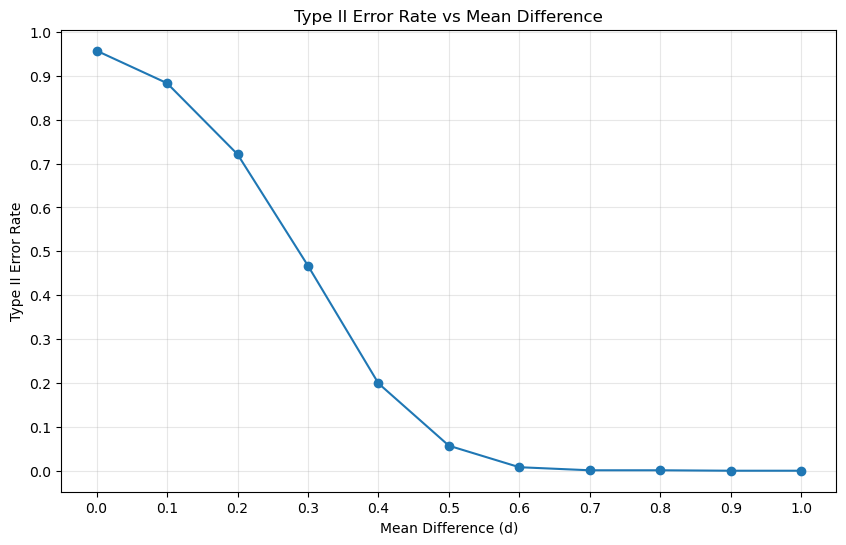

In [166]:
# Plotting the curve.
plt.figure(figsize=(10,6))
# Plot the Type II error rates against the true mean differences.
plt.plot(mean_differences, type_ii_errors, marker='o')
    # - mean_differences: values of d from 0.0 to 1.0
    # - type_ii_errors: proportion of times the null hypothesis was NOT rejected
    # - marker='o': adds circular markers at each data point

# Adding a title.
plt.title("Type II Error Rate vs Mean Difference")

# Label the x-axis and y-axis.
plt.xlabel("Mean Difference (d)")
plt.ylabel("Type II Error Rate")

# Setting ticks every 0.1 on both axes
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Adding a grid with light transparency to improve readability.
plt.grid(alpha=0.3)

# Displaying the plot.
plt.show()


We plotted the Type II error rate against the true mean difference 𝑑. The plot showed how the Type II error rate decreased as the true mean difference increased.
- When 𝑑=0, the Type II error rate was highest (~1), because the null hypothesis was true.
- As 𝑑 increased, Type II errors decreased steadily.
- When 𝑑 approached 1.0, the test almost always correctly rejected the null hypothesis.

####  - Conclusion

In his problem, we explored Type II errors in the context of independent two-sample t-tests by simulating repeated experiments for varying mean differences between two normal populations. The simulation results clearly demonstrate that when the true mean difference is small (d close to 0), the Type II error rate is high, meaning the test often fails to detect a real difference. As the mean difference increases, the Type II error rate decreases steadily, indicating that the likelihood of correctly rejecting a false null hypothesis improves with larger effect sizes. When the mean difference is large (d close to 1.0), the Type II error rate approaches zero, showing that the test almost always identifies the difference. 

These findings highlight the fundamental relationship between effect size, sample size, and statistical power: larger true differences and sufficient sample sizes reduce the probability of Type II errors, increasing the reliability of the hypothesis test. Overall, this simulation reinforces the importance of considering effect size and sample size when designing experiments to ensure adequate test sensitivity.


*****
## Problem 4: ANOVA

In this problem, we investigated how to compare the means of more than two groups using one-way ANOVA and contrasted this approach with performing multiple pairwise two-sample t-tests. The goal was to understand both the statistical results and why ANOVA is generally preferred when comparing several group means simultaneously.

####  - Libraries:

In [185]:
# Numerical computations and random sampling
import numpy as np

# Statistical tests
from scipy.stats import f_oneway, ttest_ind

# Plotting
import matplotlib.pyplot as plt

#### - Part A: Generating the Data

In [186]:
# Set random seed for reproducibility
np.random.seed(42)

# Sample size
sample_size = 30

# Generate three independent samples
sample_1 = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
sample_2 = np.random.normal(loc=0.5, scale=1.0, size=sample_size)
sample_3 = np.random.normal(loc=1.0, scale=1.0, size=sample_size)

#### - Part B: Visualization (Boxplots)

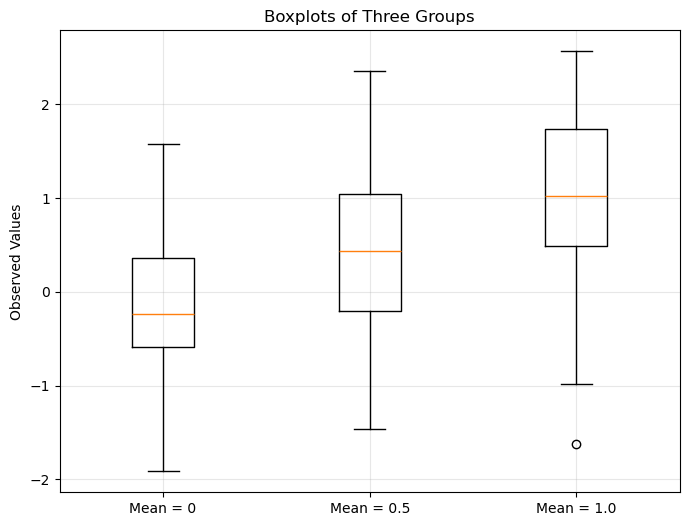

In [187]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [sample_1, sample_2, sample_3],
    tick_labels=["Mean = 0", "Mean = 0.5", "Mean = 1.0"]
)
plt.title("Boxplots of Three Groups")
plt.ylabel("Observed Values")
plt.grid(alpha=0.3)
plt.show()


#### - Part C: One-Way ANOVA

In [189]:
# Perform one-way ANOVA
anova_stat, anova_p = f_oneway(sample_1, sample_2, sample_3)

print("ANOVA F-statistic:", anova_stat)
print("ANOVA p-value:", anova_p)


ANOVA F-statistic: 12.209525517972807
ANOVA p-value: 2.1200748140507065e-05


#### - Part D: Pairwise Two-Sample t-Tests

In [190]:
# Pairwise t-tests
t12, p12 = ttest_ind(sample_1, sample_2)
t13, p13 = ttest_ind(sample_1, sample_3)
t23, p23 = ttest_ind(sample_2, sample_3)

print("Sample 1 vs Sample 2 p-value:", p12)
print("Sample 1 vs Sample 3 p-value:", p13)
print("Sample 2 vs Sample 3 p-value:", p23)


Sample 1 vs Sample 2 p-value: 0.019717941865758048
Sample 1 vs Sample 3 p-value: 7.737964508099689e-06
Sample 2 vs Sample 3 p-value: 0.013347246886682379


#### - Conclusion

In this problem, three independent samples were generated from normal distributions with equal variance but increasing means, allowing a controlled comparison of methods for assessing differences across multiple groups. The one-way ANOVA produced a highly significant result, indicating that not all population means were equal. Subsequent pairwise t-tests confirmed that each group differed significantly from the others, with the strongest evidence observed between the groups with the largest separation in means.

Overall, this analysis demonstrates how ANOVA and t-tests complement each other: ANOVA efficiently detects the presence of overall differences while controlling Type I error, and pairwise t-tests provide detailed insight into where those differences occur. This reinforces the standard practice of using ANOVA as the primary tool for comparing multiple group means.

***********
# End
last commit on 20/12/2025.